# Exercise for UML

# Project Title - Spotify recommender system
## About the Dataset
These dataset contains 114000 song and metadata about the songs such as their popularity and genres. The exercise is divided in three part mainly EDA, PCA and Clustering and finally the recommender system.
Try to write your own functions and know your keyboard shortcuts.
You can work on GoogleCollab or work locally.

The dataset: https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify_UML/spotify.csv

# Part 1

## Goals of Part 1
    1. Clean up the dataset and check for duplicates
    2. EDA
    3. Plots
## Relevant libraries for this part
    1. Pandas
    2. Numpy
    3. Matplotlib
    4. Seaborn
    5. Pygwalker



## Exercises Part 1

In [107]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import altair as alt
import pygwalker as pyg # this is installed in the terminal as well
import matplotlib.pyplot as plt

In [108]:
# Import the dataset. 

## Define the URL of the dataset
url = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify_UML/spotify.csv"

## Use Pandas to read the dataset into a DataFrame
data = pd.read_csv(url)

## Display the first few rows of the dataset to understand its structure
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [109]:
# Understand the dataset. What columns are available?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [110]:
# We can also get the columns by running this code
columns = data.columns
print("Columns available in the dataset:")
for column in columns:
    print(column)

Columns available in the dataset:
Unnamed: 0
track_id
artists
album_name
track_name
popularity
duration_ms
explicit
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
track_genre


In [111]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [112]:
# To generate descriptive statistics, use .describe funktion.
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [113]:
# To see the count number of distinct elements in specified axis:
data.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [114]:
# Drop unused column
data_sort = data.drop(['Unnamed: 0'], axis=1)

In [115]:
# Check for missing values. How would you handle them?
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
missing_values

# There are null values (missing values) in three different columns 'artists', 'album_name' and 'track_name'.

Missing values in the dataset:


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [116]:
# To show the columns which have missing values print this code
missing_values = data.isna().any()
missing_values[missing_values].index.tolist()

['artists', 'album_name', 'track_name']

In [117]:
# The way to handle them is to use 'ffill' metode.
# ffill: propagate last valid observation forward to next valid.
data = data_sort.dropna()

data.isnull().sum() # Now there is no missing values left

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [118]:
data_sort.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [119]:
# Search of duplicate rows
# This code calculates and returns the count of duplicate rows in the df based on the 'track_id' column.
data_sort.duplicated(subset=['track_id']).count()

114000

In [120]:
# Print for which rows we have duplicates
duplicates = data_sort[data_sort.duplicated(subset=['track_id'], keep=False)]

if duplicates.empty:
    print("No duplicate track_ids found.")
else:
    print("Duplicate track_ids found:")
    print(duplicates['track_name'])

Duplicate track_ids found:
0                                Comedy
1                      Ghost - Acoustic
5                  Days I Will Remember
6                         Say Something
7                             I'm Yours
                      ...              
113572         Jesus We Love You - Live
113605    In The Ordinary - Spontaneous
113617                 King of My Heart
113619                           Simple
113641                           Closer
Name: track_name, Length: 40900, dtype: object


In [121]:
# Drop the duplicates in 'track_id' column
data_sort.drop_duplicates(subset=['track_id'], inplace=True)

In [122]:
df = data_sort

In [123]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [124]:
# See the row which have NA
df[df['artists'].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [125]:
# Drop NA in the selected columns
df = df.dropna(subset=['artists', 'album_name', 'track_name'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 89740 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float

In [126]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [127]:
# Rank genres by the average popularity of their songs. Which genres tend to have more popular songs?
popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
popularity

track_genre
k-pop             59.423581
pop-film          59.096933
metal             56.422414
chill             53.738683
latino            51.788945
                    ...    
detroit-techno    11.130753
latin              9.855072
jazz               9.790076
romance            3.549779
iranian            2.224696
Name: popularity, Length: 113, dtype: float64

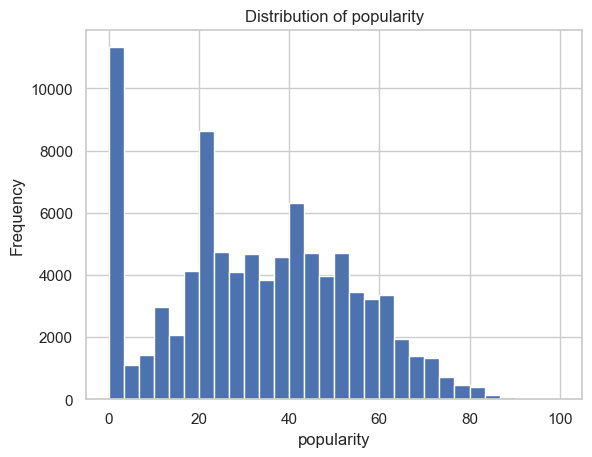

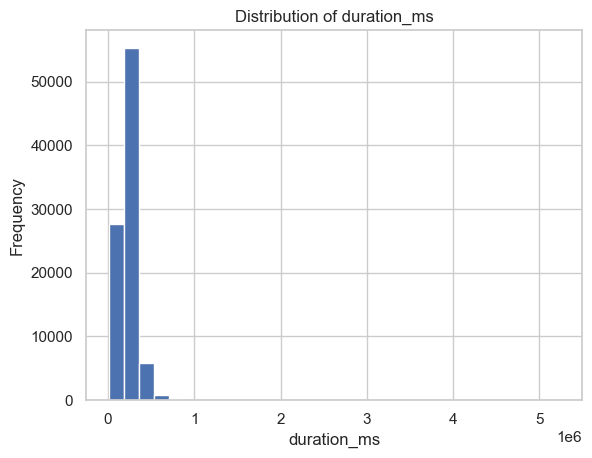

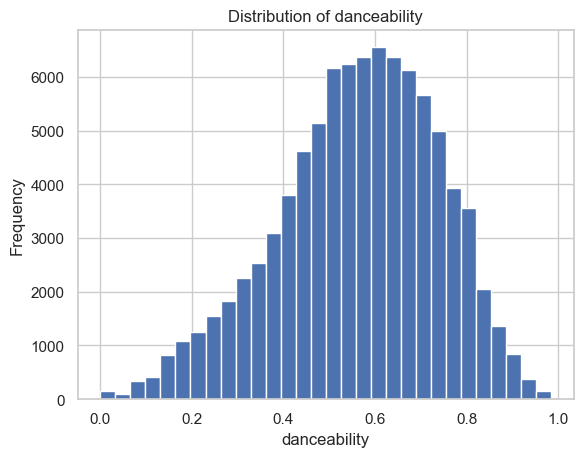

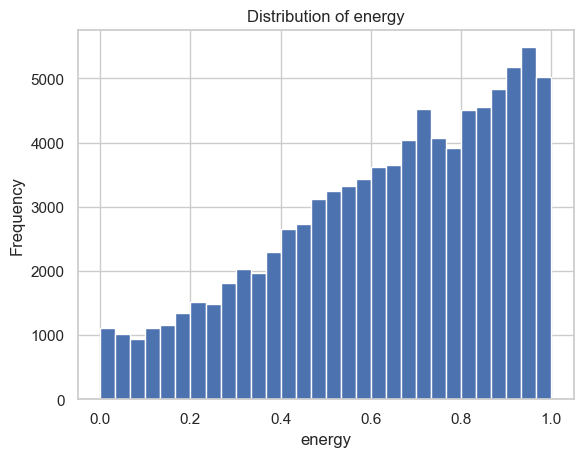

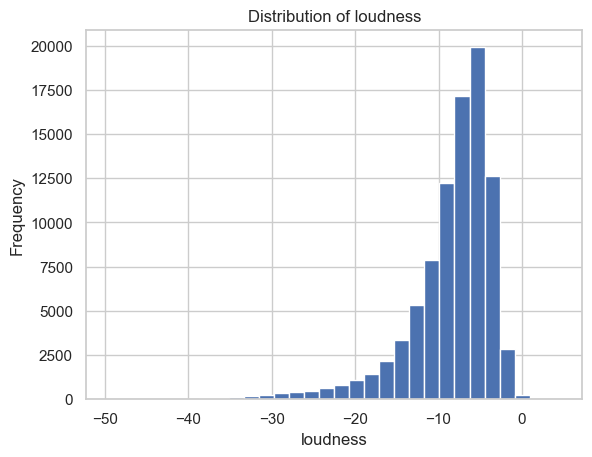

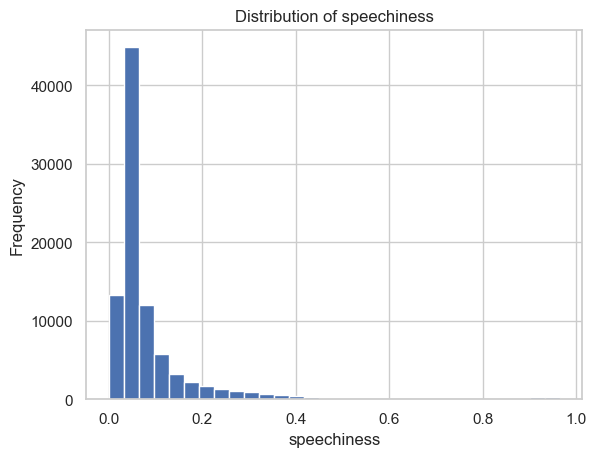

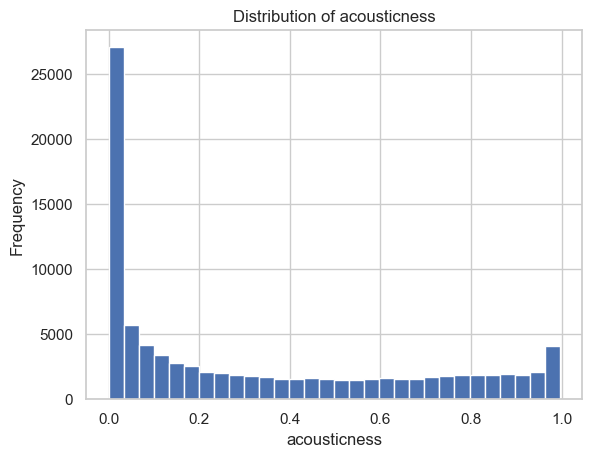

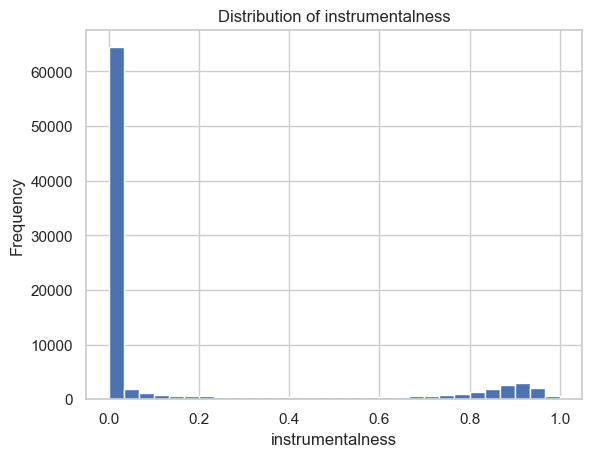

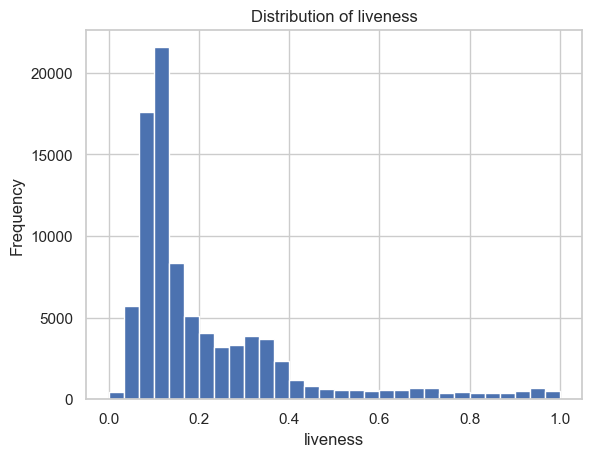

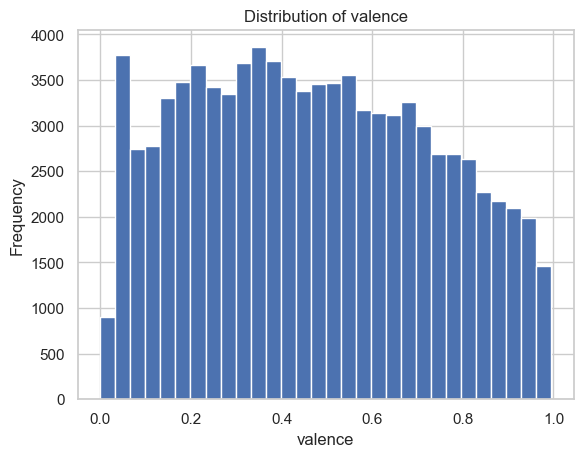

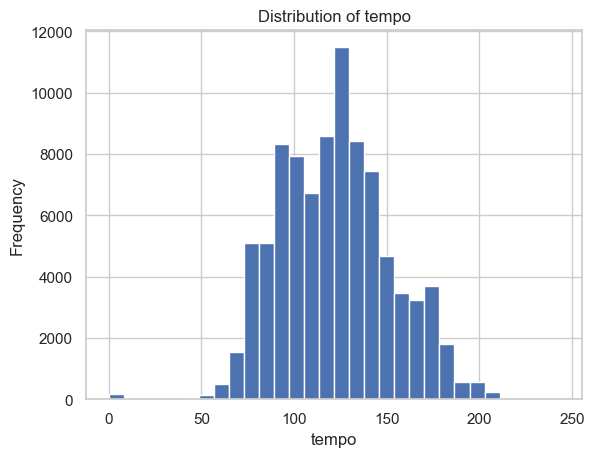

In [128]:
# Make histograms for all numerical columns
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for column in numerical_columns:
    plt.hist(df[column], bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

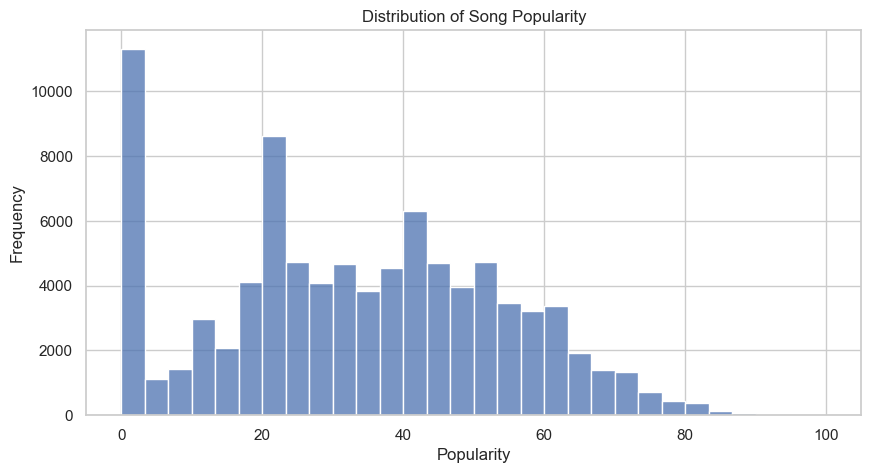

In [129]:
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], kde=False, bins=30)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

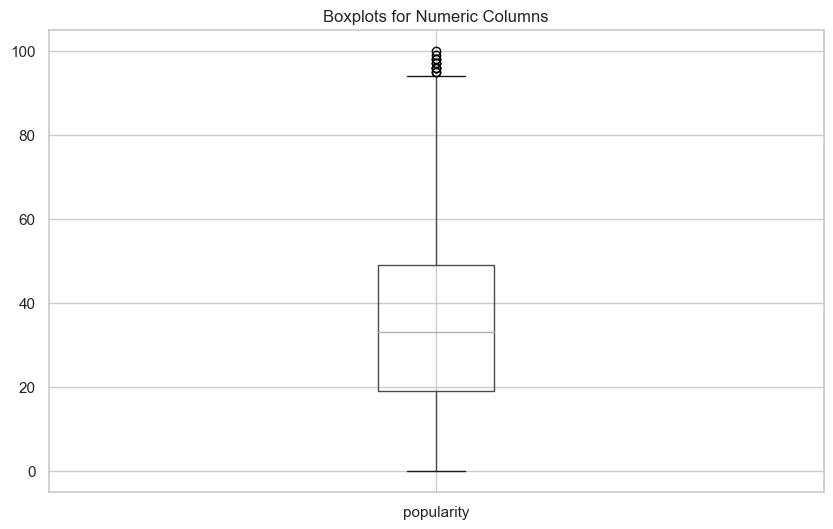

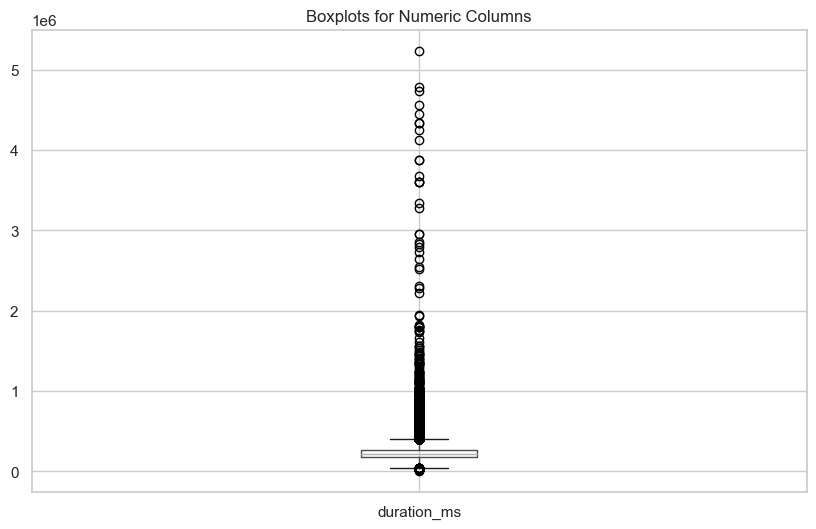

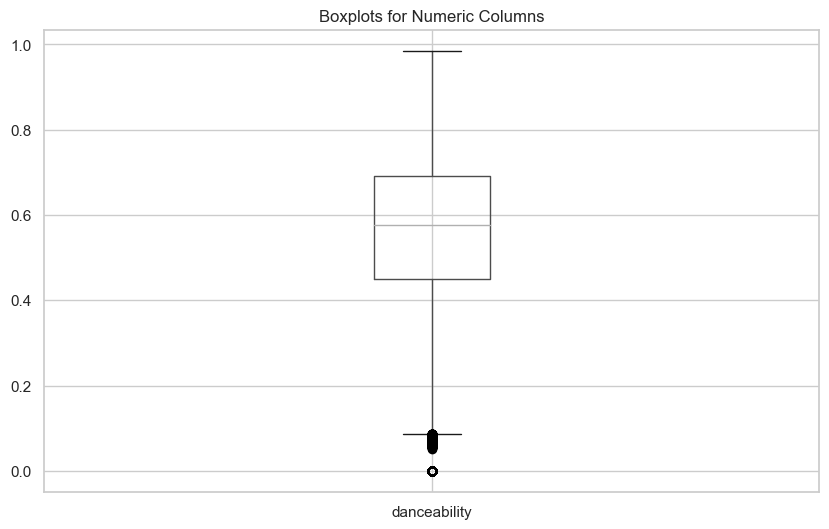

In [130]:
# We have created box plots for some of the numeric columns to detect outliers 
plt.figure(figsize=(10, 6))
df.boxplot(column=['popularity'])
plt.title("Boxplots for Numeric Columns")
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column=['duration_ms'])
plt.title("Boxplots for Numeric Columns")
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column=['danceability'])
plt.title("Boxplots for Numeric Columns")
plt.show()

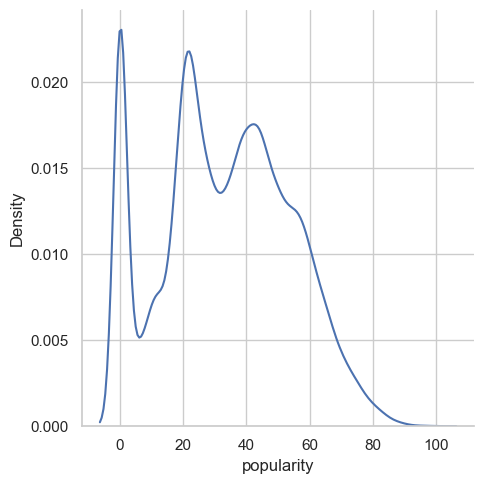

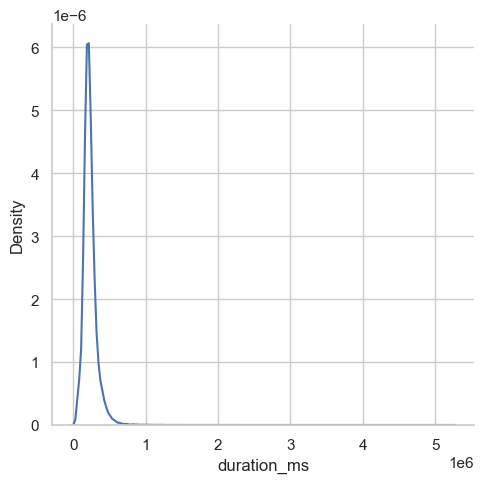

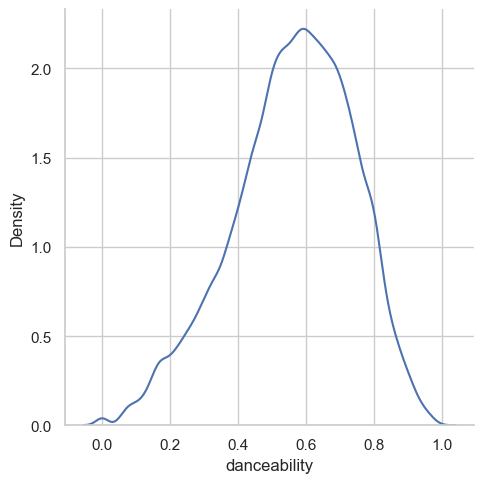

In [131]:
# What are the distributions of song popularity, duration_ms, and danceability? Use appropriate visualizations.
sns.displot(data=df,
            x="popularity",
            kind="kde")
sns.displot(data=df,
            x="duration_ms",
            kind="kde")
sns.displot(data=df,
            x="danceability",
            kind="kde")

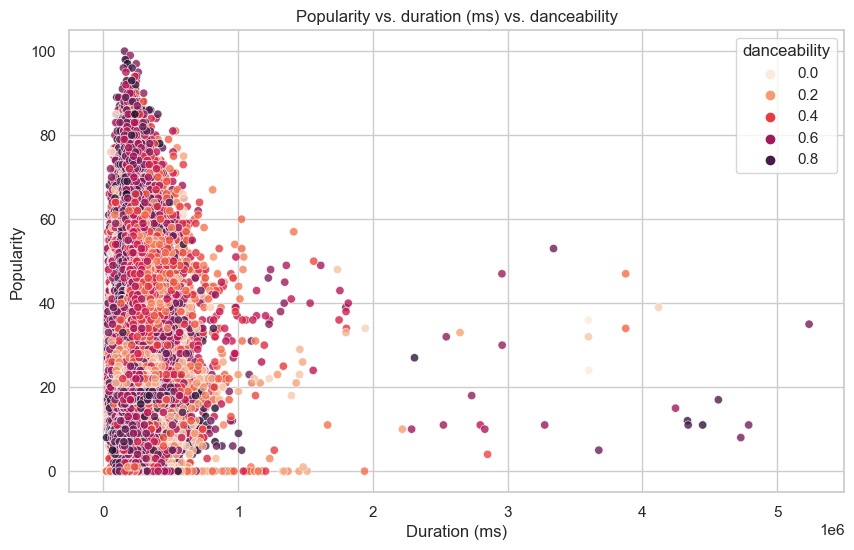

In [132]:
# We can also make a scatter plot with hue on top to have all of the three variables in one visual.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['duration_ms'], y=df['popularity'], hue=df['danceability'], palette="rocket_r", alpha=0.8)

plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Popularity vs. duration (ms) vs. danceability')
plt.grid(True)

plt.show()

In [133]:
# How many unique genres are in the dataset? List the top 20. (Explain how you choose to list the top 20)
# To calculate the number of different genres print the below
unique_genres = df['track_genre'].nunique()
print("Number of unique genres:", unique_genres)

Number of unique genres: 113


In [134]:
# For listing the genre in a list 
unique_values = df['track_genre'].unique()
unique_values
print("Unique Values in 'track_genre':")
for value in unique_values:
    print(f"- {value}")

Unique Values in 'track_genre':
- acoustic
- afrobeat
- alt-rock
- alternative
- ambient
- anime
- black-metal
- bluegrass
- blues
- brazil
- breakbeat
- british
- cantopop
- chicago-house
- children
- chill
- classical
- club
- comedy
- country
- dance
- dancehall
- death-metal
- deep-house
- detroit-techno
- disco
- disney
- drum-and-bass
- dub
- dubstep
- edm
- electro
- electronic
- emo
- folk
- forro
- french
- funk
- garage
- german
- gospel
- goth
- grindcore
- groove
- grunge
- guitar
- happy
- hard-rock
- hardcore
- hardstyle
- heavy-metal
- hip-hop
- honky-tonk
- house
- idm
- indian
- indie-pop
- indie
- industrial
- iranian
- j-dance
- j-idol
- j-pop
- j-rock
- jazz
- k-pop
- kids
- latin
- latino
- malay
- mandopop
- metal
- metalcore
- minimal-techno
- mpb
- new-age
- opera
- pagode
- party
- piano
- pop-film
- pop
- power-pop
- progressive-house
- psych-rock
- punk-rock
- punk
- r-n-b
- reggae
- reggaeton
- rock-n-roll
- rock
- rockabilly
- romance
- sad
- salsa
- samba


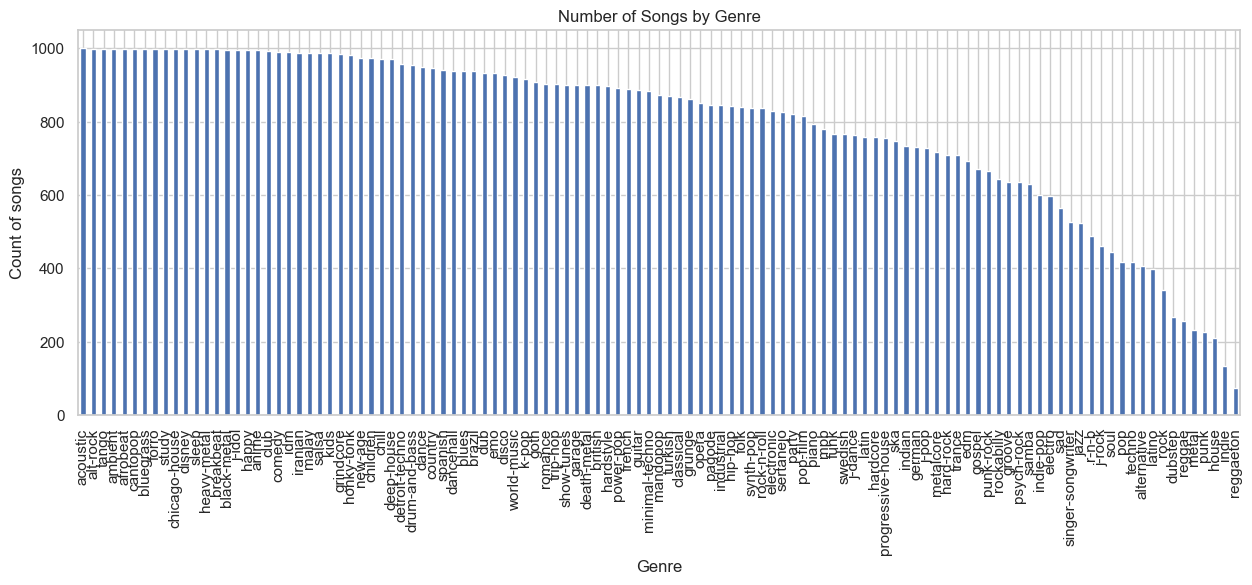

In [135]:
# Visualize the number of songs by genre. Which are the most common genres?
# There is 1000 song in each genre so all genres are equally represented in the dataset.
genre_counts = df['track_genre'].value_counts()

plt.figure(figsize=(15, 5))
genre_counts.plot(kind='bar')

plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count of songs')
plt.xticks(rotation=90) # Here we have rotated the x-axis labels for better readability

plt.show()

In [136]:
# If we want to make a column in the df which shows the rank, we can follow the below steps.

## Group by 'track_genre' and calculate the average popularity for each genre
genre_popularity_rank = df.groupby('track_genre')['popularity'].mean().reset_index()

## Rank genres by popularity in descending order
genre_popularity_rank['popularity_rank'] = genre_popularity_rank['popularity'].rank(ascending=False, method='min')

## Sort the DataFrame by popularity rank
genre_popularity_rank = genre_popularity_rank.sort_values(by='popularity_rank')

## Merge the popularity rank DataFrame with the original DataFrame
df = df.merge(genre_popularity_rank[['track_genre', 'popularity_rank']], on='track_genre', how='left')

## Display the updated DataFrame
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_rank
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,25.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,25.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,25.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,25.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,25.0


In [137]:
# List the top 20. (Explain how you choose to list the top 20)
top_20_popular_genres = popularity.head(20).index
top_20_popular_genres

Index(['k-pop', 'pop-film', 'metal', 'chill', 'latino', 'sad', 'grunge',
       'indian', 'anime', 'emo', 'reggaeton', 'sertanejo', 'piano',
       'progressive-house', 'hard-rock', 'pagode', 'deep-house', 'mandopop',
       'british', 'metalcore'],
      dtype='object', name='track_genre')

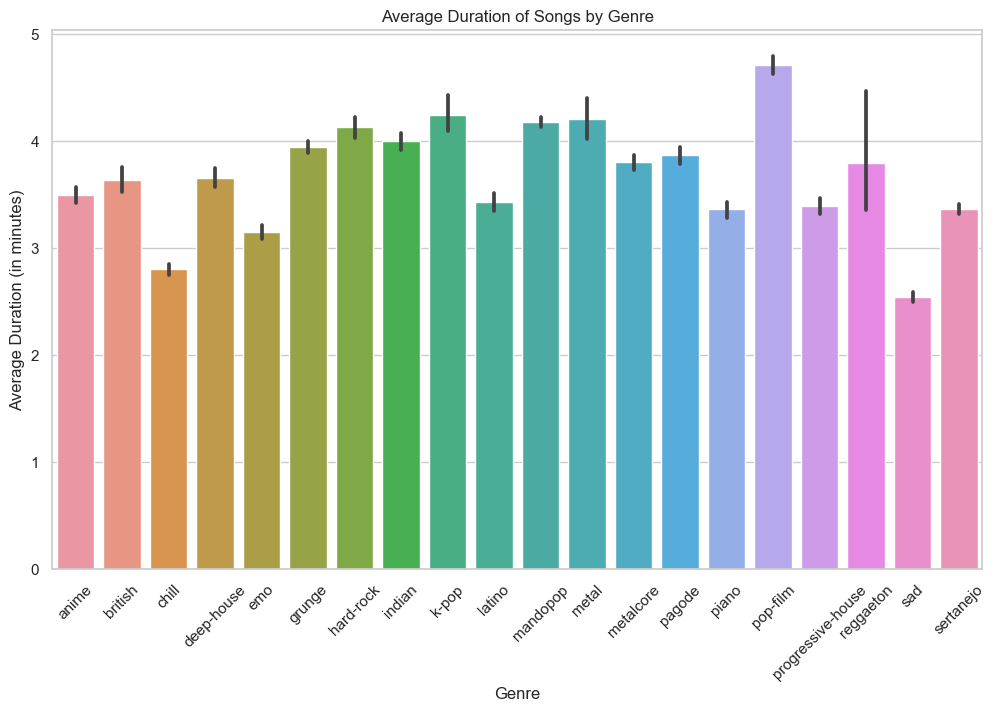

In [138]:
# make a filtered_data (df) for only analyzing on the must popular genres
filtered_data = df[df['track_genre'].isin(top_20_popular_genres)]

plt.figure(figsize=(12,7))
sns.barplot(x=filtered_data['track_genre'], y=filtered_data['duration_ms']/60000)  # Convert to minutes
plt.title('Average Duration of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (in minutes)')
plt.xticks(rotation=45)
plt.show()

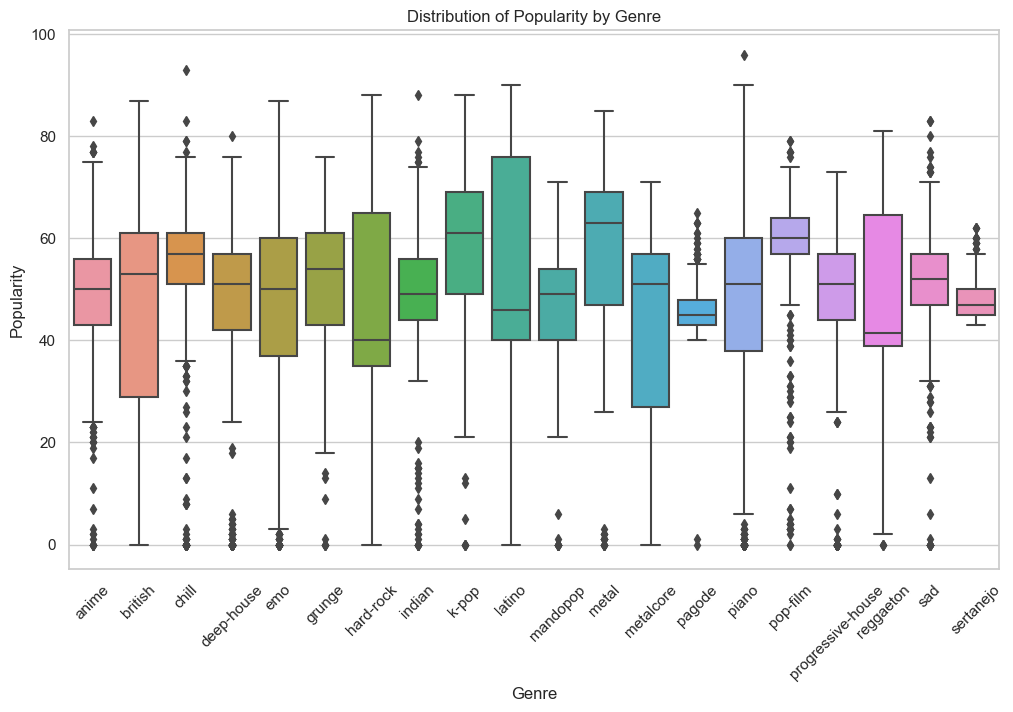

In [139]:
plt.figure(figsize=(12,7))
sns.boxplot(x=filtered_data['track_genre'], y=filtered_data['popularity'])
plt.title('Distribution of Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

In [140]:
# Dance value is low for ex opera, sleep and so on which is expected
dance = df.groupby('track_genre')['danceability'].mean().sort_values(ascending=False)
dance

track_genre
kids              0.778808
chicago-house     0.766240
latino            0.755487
reggaeton         0.743284
minimal-techno    0.732045
                    ...   
opera             0.309923
iranian           0.300347
black-metal       0.296672
grindcore         0.272277
sleep             0.167238
Name: danceability, Length: 113, dtype: float64

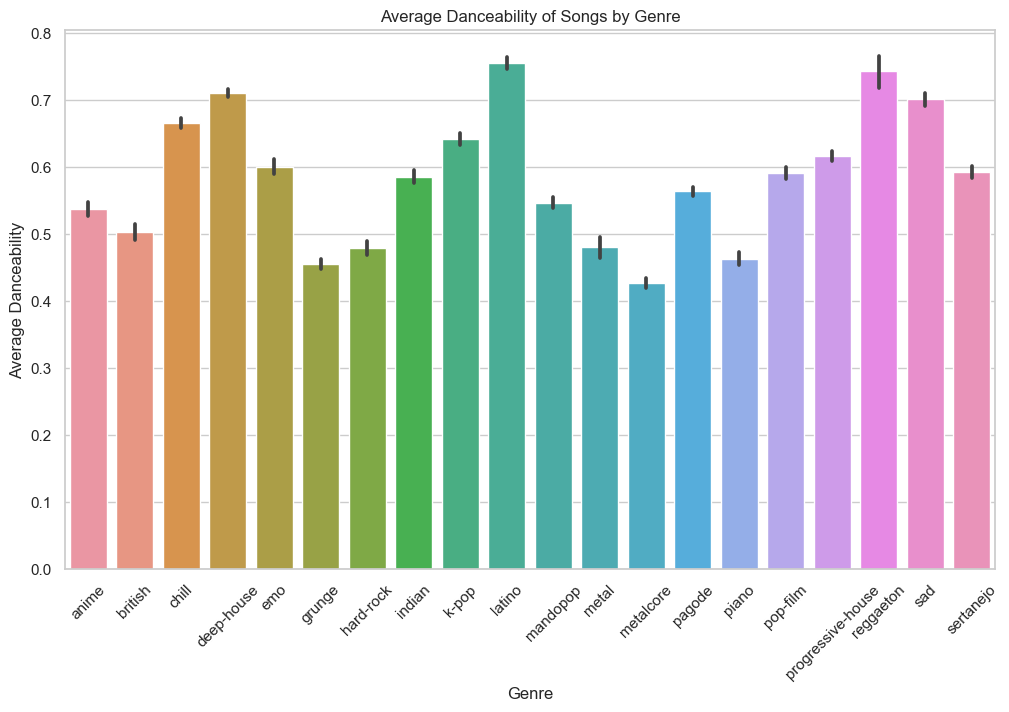

In [141]:
plt.figure(figsize=(12,7))
sns.barplot(x=filtered_data['track_genre'], y=filtered_data['danceability'])
plt.title('Average Danceability of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.xticks(rotation=45)
plt.show()

In [142]:
# Explore other characteristics (like danceability, energy, etc.) by genre. Are there any noticeable differences or trends?
energy = df.groupby('track_genre')['energy'].mean().sort_values(ascending=False)
energy

track_genre
death-metal    0.932165
grindcore      0.926018
happy          0.910693
metalcore      0.902281
hardstyle      0.899488
                 ...   
romance        0.298848
opera          0.295048
ambient        0.237257
new-age        0.212632
classical      0.196554
Name: energy, Length: 113, dtype: float64

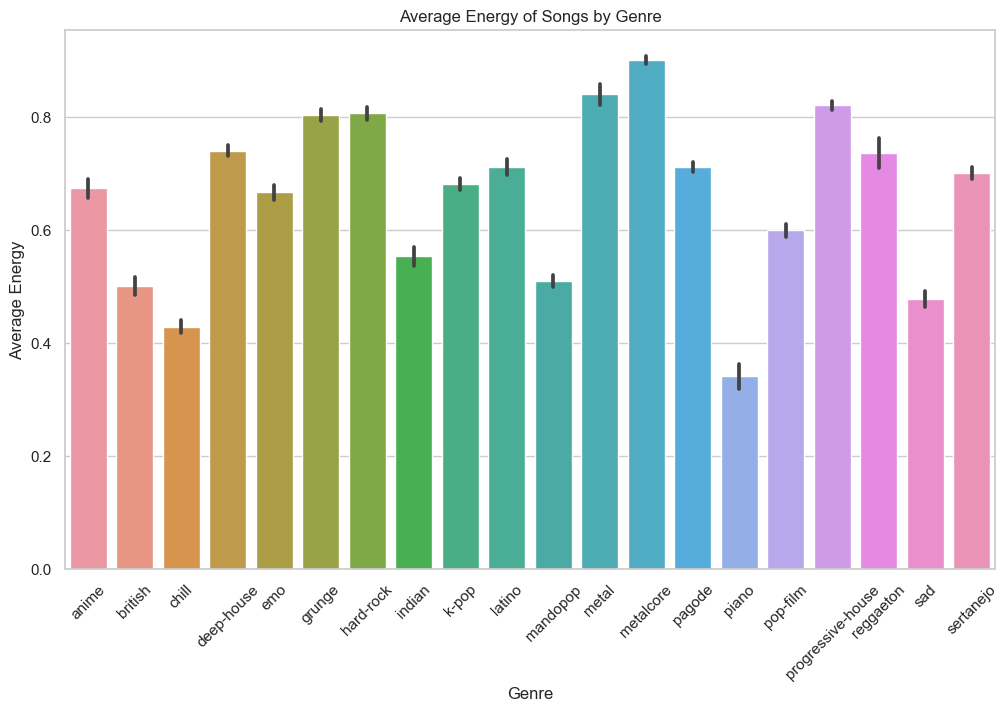

In [143]:
plt.figure(figsize=(12,7))
sns.barplot(x=filtered_data['track_genre'], y=filtered_data['energy'])
plt.title('Average Energy of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Energy')
plt.xticks(rotation=45)
plt.show()

In [144]:
# 1 milliseconds (ms) is equal to 1.666667×10^-5 minutes (min). 
# Conversely, 1 minutes (min) is equal to 60000 milliseconds (ms).

# Therefore, we have divided the milliseconds column with 6000 to get the duration in minutes
df['duration_minutes'] = df['duration_ms'] / 60000

# As below we can se a noticeable differences for the duration between the different genres
duration_minutes = df.groupby('track_genre')['duration_minutes'].mean().sort_values(ascending=False)
duration_minutes

track_genre
detroit-techno    6.212381
minimal-techno    6.187208
chicago-house     6.114782
iranian           5.326178
techno            5.314420
                    ...   
disney            2.604554
sad               2.541261
study             2.358954
children          2.307790
grindcore         2.209236
Name: duration_minutes, Length: 113, dtype: float64

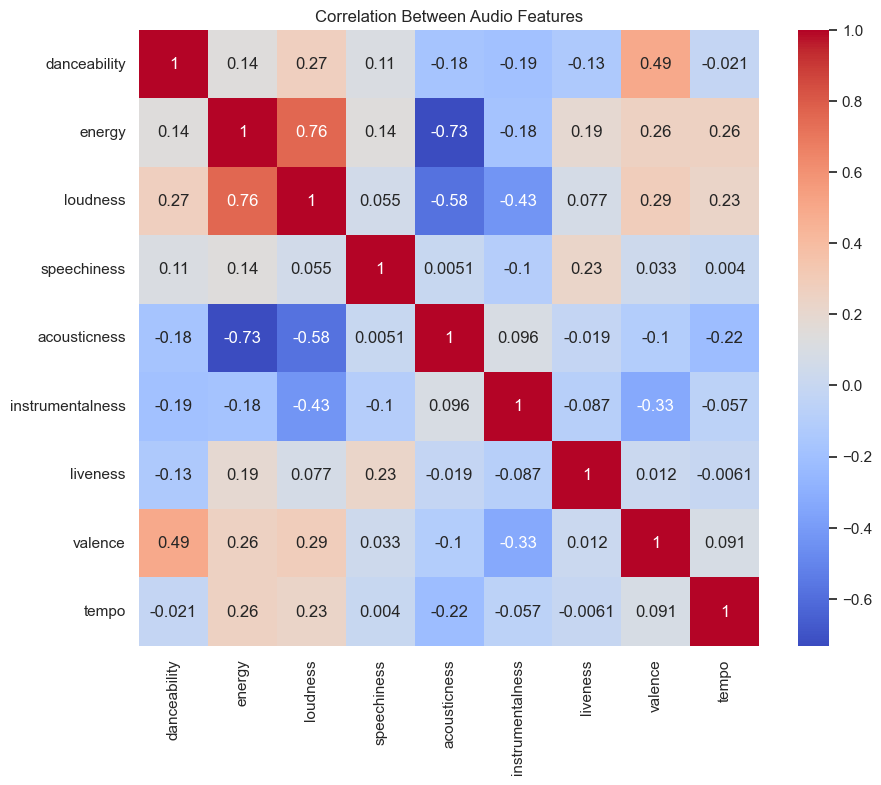

In [145]:
# Make a headmap fir all the audio_features to explore any correlation 
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
correlation = df[audio_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()


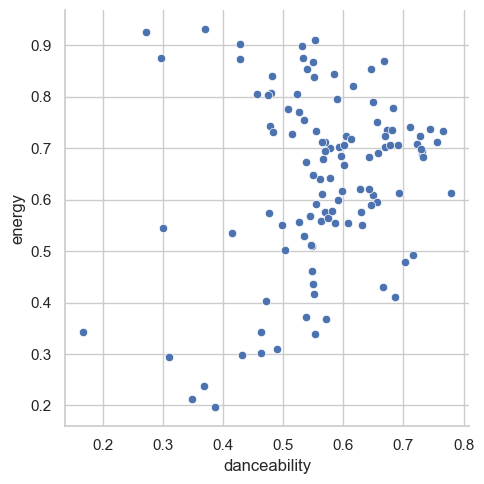

In [146]:
# Investigate the relationship between danceability and energy. Do songs that are more danceable tend to have more energy? Use a scatter plot.
sns.relplot(data=df,
            x=dance,
            y=energy,
            kind="scatter")

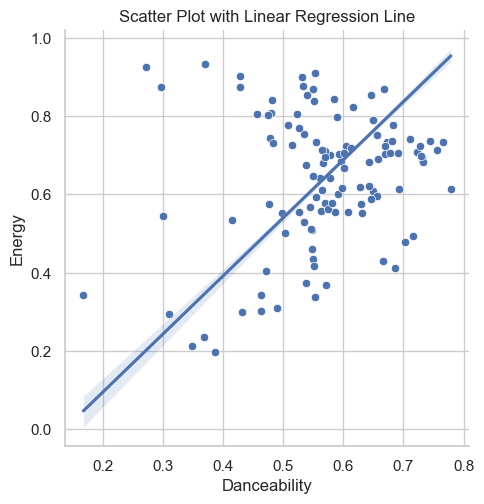

In [147]:
# We can also make a scatterplot wiht a linear regression line to see the relationship between danceability and energy

# Set the sns.set to style="whitegrid" to get gridlines
# Set the Seaborn style to 'ggplot'
sns.set(style="whitegrid")

# Create a scatter plot with sns.relplot
scatter_plot_dance_energy = sns.relplot(data=df, x=dance, y=energy, kind="scatter")

# Add a linear regression line using sns.regplot
sns.regplot(data=df, x=dance, y=energy, scatter=False, ax=scatter_plot_dance_energy.ax)

# Optional: Customize the plot
plt.title("Scatter Plot with Linear Regression Line")
plt.xlabel("Danceability")
plt.ylabel("Energy")

# Show the plot
plt.show()

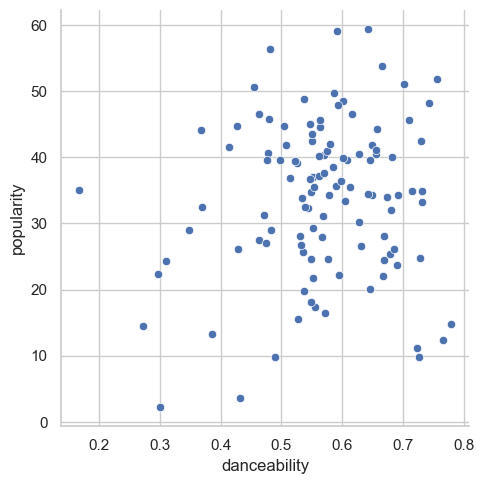

In [148]:
# How does song popularity relate to other characteristics like danceability, loudness, or tempo?
sns.relplot(data=df,
            x=dance,
            y=popularity,
            kind="scatter")

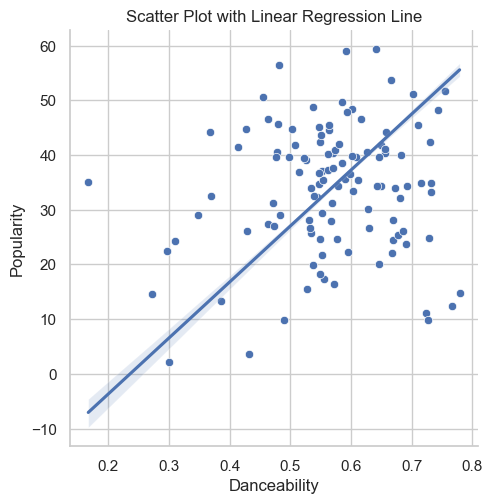

In [149]:
# Scatterplot wiht a linear regression line 
scatter_plot_dance_popularity = sns.relplot(data=df, x=dance, y=popularity, kind="scatter")
sns.regplot(data=df, x=dance, y=popularity, scatter=False, ax=scatter_plot_dance_popularity.ax)

# Optional: Customize the plot
plt.title("Scatter Plot with Linear Regression Line")
plt.xlabel("Danceability")
plt.ylabel("Popularity")

# Show the plot
plt.show()

In [150]:
# How do explicit songs compare to non-explicit ones in terms of popularity or other characteristics?
# First we group data into explicit and non-explicit songs

explicit_songs = df[df['explicit'] == True]  # Select rows where 'explicit' is True
non_explicit_songs = df[df['explicit'] == False]  # Select rows where 'explicit' is False

# Compare popularity using summary statistics
explicit_popularity_mean = explicit_songs['popularity'].mean()
non_explicit_popularity_mean = non_explicit_songs['popularity'].mean()

# Print the mean popularity for explicit and non-explicit songs
print(f"Mean Popularity for Explicit Songs: {explicit_popularity_mean}")
print(f"Mean Popularity for Non-Explicit Songs: {non_explicit_popularity_mean}")

Mean Popularity for Explicit Songs: 36.88564382139148
Mean Popularity for Non-Explicit Songs: 32.852576917450875


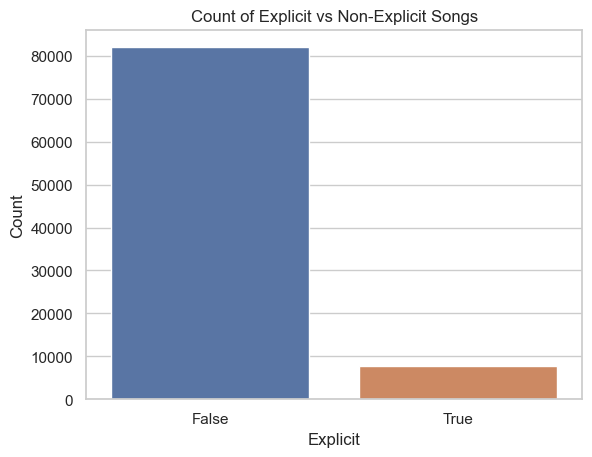

In [151]:
sns.countplot(x=df['explicit'])
plt.title('Count of Explicit vs Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.show()

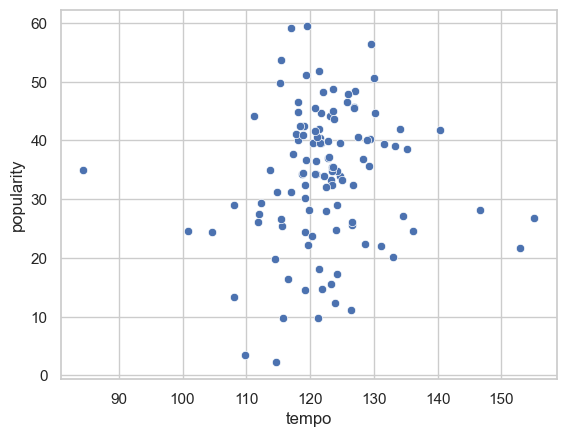

In [152]:
# Are there any trends related to tempo or time_signature?

# As we can see from be bleow one the sweetspot looks like to se at tempo 110-130.
tempo = df.groupby('track_genre')['tempo'].mean().sort_values(ascending=False)
popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.scatterplot(data=df, x=tempo, y=popularity)
plt.show()

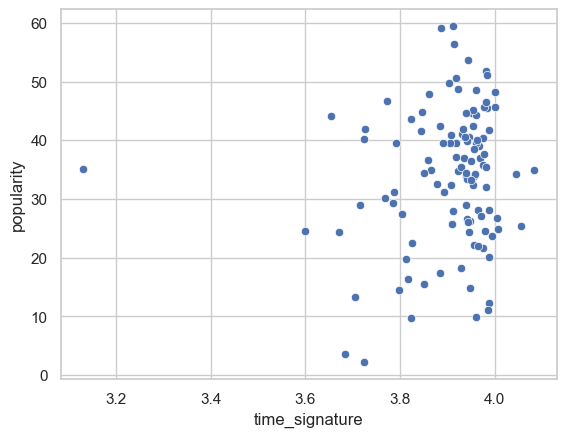

In [153]:
# Plot for time_signature
time_signature = df.groupby('track_genre')['time_signature'].mean().sort_values(ascending=False)
popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
sns.scatterplot(data=df, x=time_signature, y=popularity)
plt.show()

# Part 2

## Goals of Part 2
    1. Pre-processing for PCA (encoding & scaling)
    2. PCA and explanations of results
    3. Clustering
## Relevant libraries for this part
    1. StandardScaler
    2. PCA
    3. KMeans



In [154]:
# Importing StandardScaler from scikit-learn (sklearn)
from sklearn.preprocessing import StandardScaler

# Importing PCA (Principal Component Analysis) from scikit-learn (sklearn)
from sklearn.decomposition import PCA

# Importing KMeans clustering algorithm from scikit-learn (sklearn)
from sklearn.cluster import KMeans

# Importing LabelEncoder from scikit-learn (sklearn)
from sklearn.preprocessing import LabelEncoder

In [155]:
# We select the below features from the dataframe
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a new DataFrame with the selected columns
X = df[features]

In [156]:
# One-hot encode the 'track_genre' column
encoded_genres = pd.get_dummies(df['track_genre'], prefix='genre')

In [157]:
# Append the encoded data to the original dataframe and drop the original 'track_genre' column
data_encoded = pd.concat([df, encoded_genres], axis=1).drop('track_genre', axis=1)

In [158]:
# Selecting relevant numerical features for PCA and clustering
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'] + list(encoded_genres.columns)

X = data_encoded[features]

In [159]:
# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [160]:
# Conducting PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

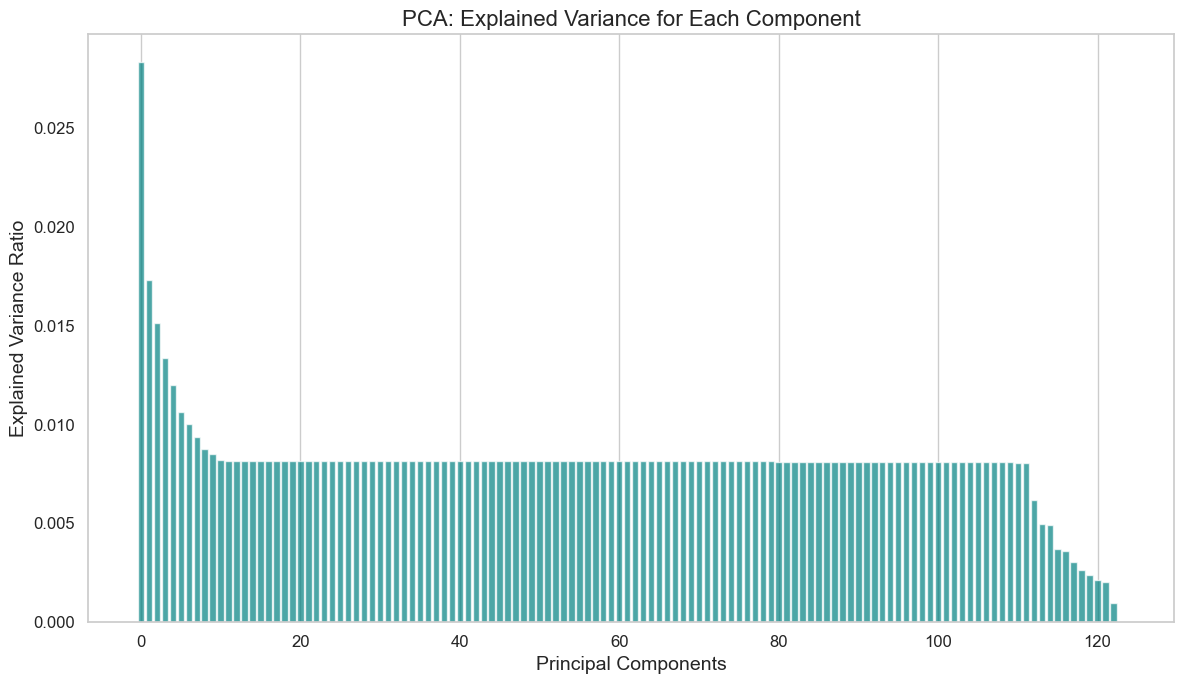

In [161]:
# Visualizing explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(12,7))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center', color='teal')
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xlabel('Principal Components', fontsize=14)
plt.title('PCA: Explained Variance for Each Component', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [162]:
# Reducing dimensions for visualization purposes (2 components)
k=2
pca = PCA(n_components=k)
X_pca_d = pca.fit_transform(X_scaled)

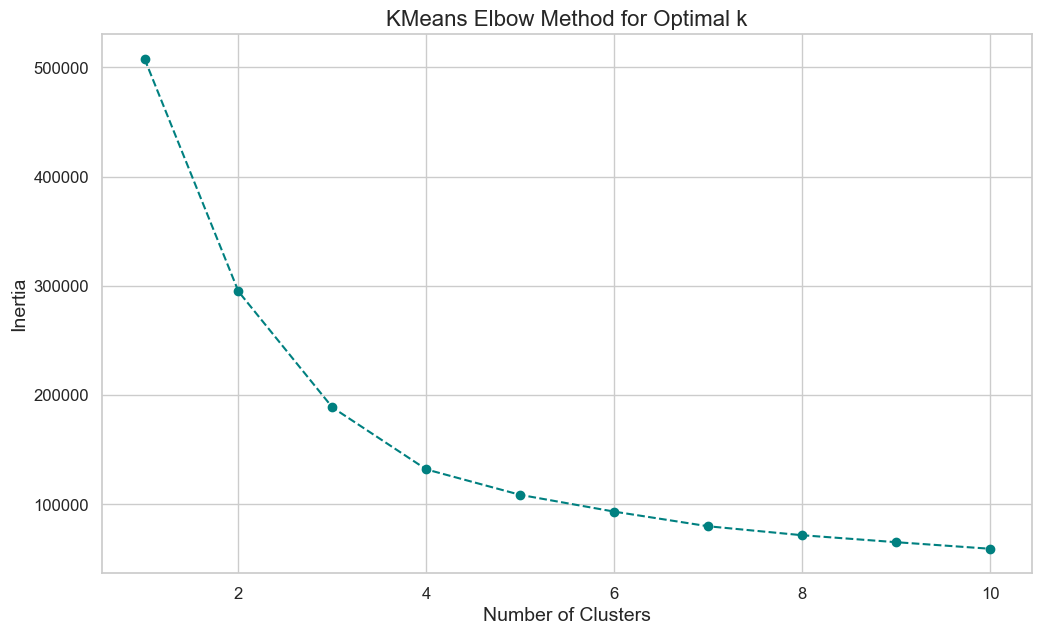

In [164]:
# Determining the optimal number of clusters for KMeans using the Elbow method
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

clusters = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_pca_d)
    clusters.append(kmeans.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(1, 11), clusters, marker='o', linestyle='--', color='teal')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('KMeans Elbow Method for Optimal k', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [165]:
# Conducting KMeans clustering (assuming 4 clusters from the elbow method)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pca_2d)
labels = kmeans.labels_

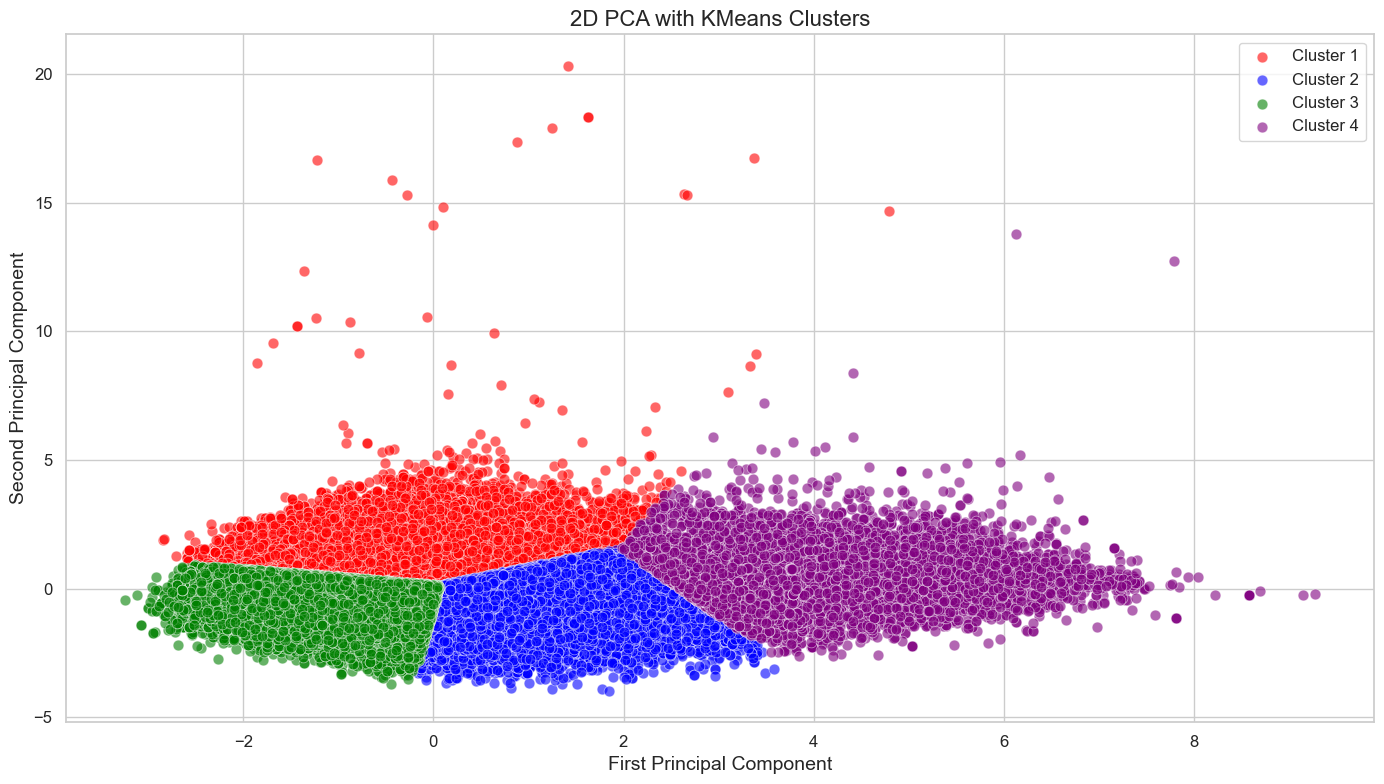

In [166]:
# Visualizing clusters
colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(14,8))
for i, color, label in zip(range(4), colors, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']):
    plt.scatter(X_pca_2d[labels == i, 0], X_pca_2d[labels == i, 1], s=60, c=color, label=label, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.legend(fontsize=12)
plt.title('2D PCA with KMeans Clusters', fontsize=16)
plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# WRONG

In [90]:
# We select the below features from the dataframe
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a new DataFrame with the selected columns
X = df[features]

In [91]:
# Handle any missing or categorical data.
# Standardize the dataset since PCA is sensitive to the magnitude of the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
# Conducting PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

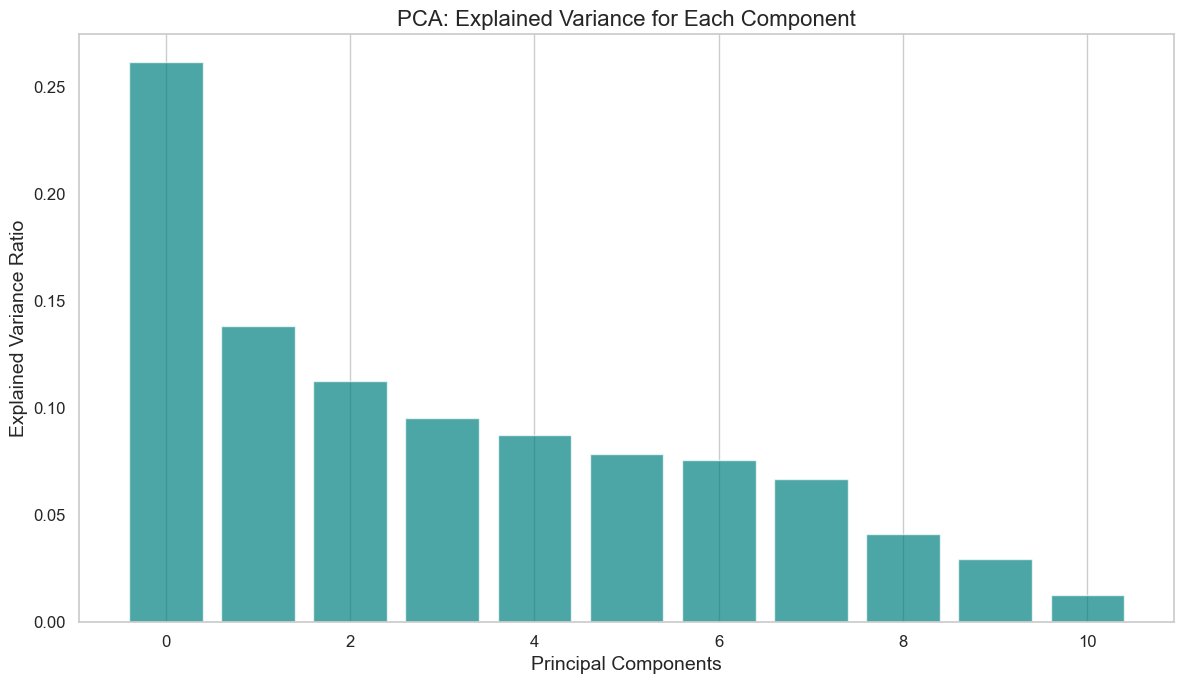

In [93]:
# Visualizing explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(12,7))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center', color='teal')
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xlabel('Principal Components', fontsize=14)
plt.title('PCA: Explained Variance for Each Component', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [96]:
# Conduct a PCA on the song characteristics.
# Create a PCA instance with the desired number of components

# Choose the number of components you want to keep
n_components = 2 
pca = PCA(n_components=n_components)

# Fit the PCA model to the data and transform the data to the principal components
X_pca_d = pca.fit_transform(X_scaled)

# Visualize the explained variance for each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.26143338 0.13856759]


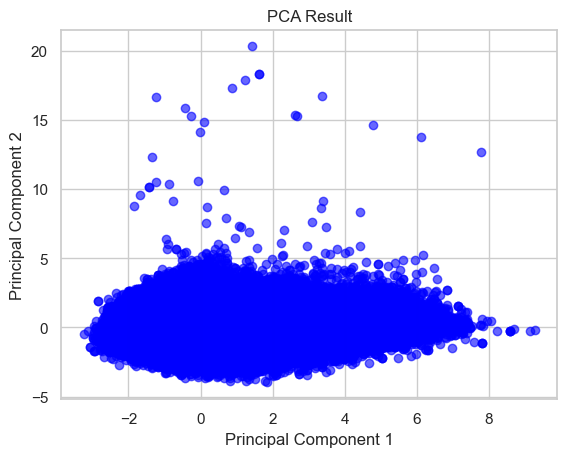

In [97]:
# Reduce the dataset's dimensions based on the PCA results and visualize the data in the reduced dimension space.
plt.scatter(x=X_pca_d[:, 0], y=X_pca_d[:, 1], alpha=0.6, color='blue')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')

plt.show()

In [98]:
# Choose a clustering algorithm (e.g., KMeans, DBSCAN, or Hierarchical).

## We're using the Kmeans because we have a lot of datapoints.

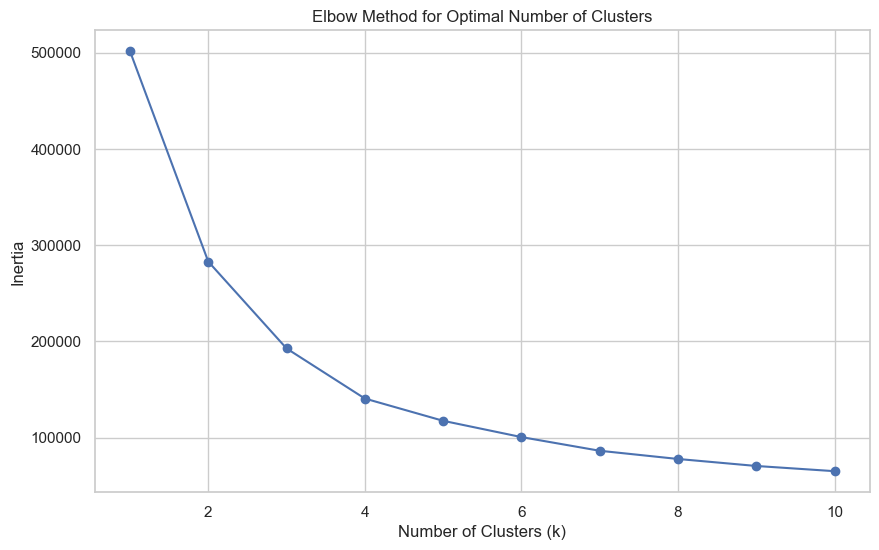

In [99]:
# Determine the optimal number of clusters (if needed, like in KMeans). explain how you get to that number of clusters

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize variables
clusters = []
k_range = range(1, 11)  # We will check for up to 10 clusters

# Run K-means with different k values and store the inertia (sum of squared distances)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca_d)
    clusters.append(kmeans.inertia_)

# Plot the Elbow method graph (sum of squared distances for each 'k')
plt.figure(figsize=(10, 6))
plt.plot(k_range, clusters, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [101]:
# Conducting KMeans clustering (assuming 4 clusters from the elbow method)
k=4
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_pca_d)
labels = kmeans.labels_

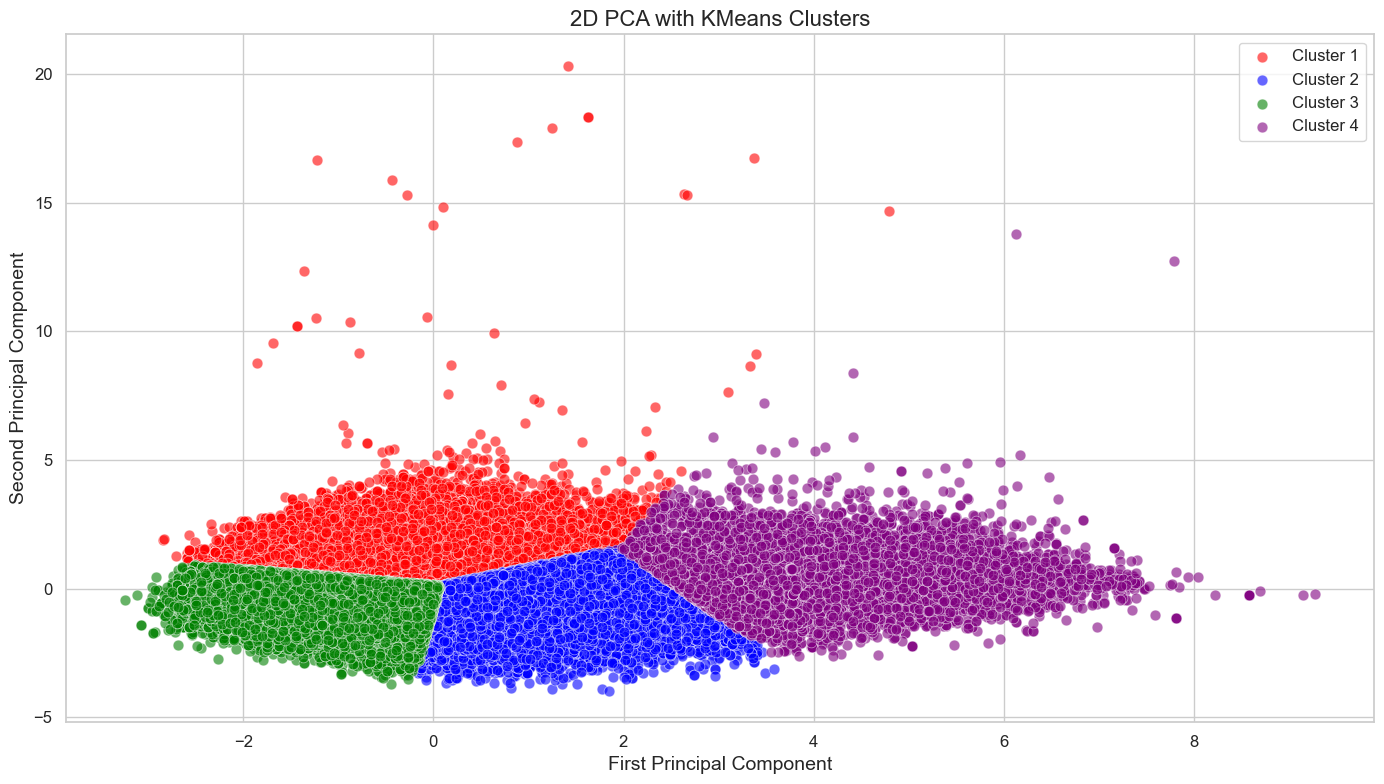

In [102]:
# Visualizing clusters
colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(14,8))
for i, color, label in zip(range(4), colors, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']):
    plt.scatter(X_pca_d[labels == i, 0], X_pca_d[labels == i, 1], s=60, c=color, label=label, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.legend(fontsize=12)
plt.title('2D PCA with KMeans Clusters', fontsize=16)
plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 3

## Goals of Part 3
    1. Vectorization   
    2. Cosine similarities
    3. Build and test recommender
    Objective: Develop a basic music recommender system that suggests songs based on textual data and put it in a small grad.io app
## Relevant libraries for this part
    1. linear_kernel
    2. TfidfVectorizer
    3. grad.io

Build the Recommender:

  Create a function that takes a song name as input and outputs a list of songs recommended based on textual similarity. For this, you'll use the cosine similarity scores.

In [167]:
# Import the liberarys
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as ss
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity

In [168]:
# Refine the Textual Data: Consider merging multiple textual columns (e.g., artist name + track name) to generate recommendations based on combined textual data.

# Merge 'artists' and 'track_name' columns with a separator
df['song_artist'] = df['artists'] + ' - ' + df['track_name']

# Display the DataFrame with the new 'combined_text' column
df[['artists', 'track_name', 'song_artist']]

,artists,track_name,song_artist
0,Gen Hoshino,Comedy,Gen Hoshino - Comedy
1,Ben Woodward,Ghost - Acoustic,Ben Woodward - Ghost - Acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,Ingrid Michaelson;ZAYN - To Begin Again
3,Kina Grannis,Can't Help Falling In Love,Kina Grannis - Can't Help Falling In Love
4,Chord Overstreet,Hold On,Chord Overstreet - Hold On
...,...,...,...
89735,Rainy Lullaby,Sleep My Little Boy,Rainy Lullaby - Sleep My Little Boy
89736,Rainy Lullaby,Water Into Light,Rainy Lullaby - Water Into Light
89737,Cesária Evora,Miss Perfumado,Cesária Evora - Miss Perfumado
89738,Michael W. Smith,Friends,Michael W. Smith - Friends


In [169]:
title = df['track_name']

In [170]:
# Create a TF-IDF vectorizer to transform song titles into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['song_artist'])

In [172]:
# Compute the cosine similarity between song titles
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.52558567],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.52558567, 0.        ,
        1.        ]])

In [173]:
# Function to get song recommendations based on a given title
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df.index[df['track_name'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    return df['track_name'].iloc[song_indices]

In [174]:
# Example: Get recommendations for a song title
recommendations = get_recommendations("As It Was")
print(recommendations)

562                            Back To You
268                          Back For Good
860                            I Will Wait
557                     you broke me first
437             Heaven Is a Place on Earth
179            Rockabye - Acoustic Version
523            Umbrella - Acoustic Version
720    Don't Wanna Know - Acoustic Version
168                      Overpass Graffiti
0                                   Comedy
Name: track_name, dtype: object
